In [1]:
import model.build_model as bm
import pandas as pd

raised = "data/raised_hand_data.csv"
clap = "data/clap_data.csv"

raised_df = pd.read_csv(raised) 
clap_df = pd.read_csv(clap)

raised_df = bm.transform(raised_df, "raise")
clap_df = bm.transform(clap_df, "clap")

df = bm.connect_df(raised_df, clap_df)
df

,x_mean,y_mean,z_mean,x_max,y_max,z_max,x_min,y_min,z_min,x_pca,...,y_seg_slope_1,y_seg_slope_2,y_seg_slope_3,y_seg_slope_4,z_seg_slope_0,z_seg_slope_1,z_seg_slope_2,z_seg_slope_3,z_seg_slope_4,target
0,0.158285,-0.661852,0.247002,1.269775,-0.009766,0.526856,-0.392090,-0.863281,-0.209961,2.150326,...,-0.016748,0.028638,0.069214,0.060913,0.129468,0.001050,-0.012402,-0.168945,-0.026001,1
1,0.069300,-0.702745,0.175094,1.379883,-0.072510,0.445557,-0.461182,-0.850342,-1.984375,2.786584,...,-0.003843,-0.000366,0.022827,0.135010,0.105636,0.010470,0.007520,-0.019165,-0.232935,1
2,0.039678,-0.767002,0.232617,1.374512,-0.086182,0.375000,-0.319824,-0.917969,-0.147949,2.037001,...,0.006567,-0.002344,0.049438,0.172534,0.056348,0.006348,0.022876,-0.023950,-0.023145,1
3,0.130127,-0.722070,0.191182,1.422119,-0.009766,0.395264,-0.390625,-0.922607,-0.360840,2.328072,...,-0.005933,-0.000610,0.064136,0.188062,0.098633,0.001416,0.003101,-0.062646,-0.014941,1
4,0.107617,-0.773662,0.124414,1.231934,0.038330,0.383545,-1.047363,-0.963623,-1.553223,2.443050,...,0.007617,0.002710,0.047363,0.165381,0.090674,-0.004785,0.003247,-0.007202,-0.147461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-0.293794,-0.634942,-0.342978,1.999939,1.287354,1.999939,-1.984375,-1.984375,-1.134277,6.680048,...,0.069162,-0.107038,-0.139872,-0.221240,0.112849,-0.171059,0.098270,0.235393,-0.398596,0
94,-0.193923,-0.768799,-0.222451,1.999939,-0.010742,1.350830,-1.984375,-1.984375,-1.984375,6.287662,...,-0.333105,0.003198,0.083716,0.059619,0.132300,0.376074,0.384131,0.050342,0.016626,0
95,-0.255941,-0.699285,-0.318885,1.892090,0.028564,0.977783,-1.984375,-1.984375,-1.984375,6.825576,...,-0.135053,-0.051496,-0.309047,0.091783,0.003688,-0.027004,-0.112575,0.236614,0.036970,0
96,-0.300849,-0.850935,-0.338887,1.999939,-0.031494,1.999939,-1.984375,-1.984375,-1.984375,7.191155,...,-0.272621,0.097391,0.192847,0.134424,0.010475,0.190632,0.438832,-0.118726,0.034741,0


<AxesSubplot:xlabel='x_mean', ylabel='Count'>

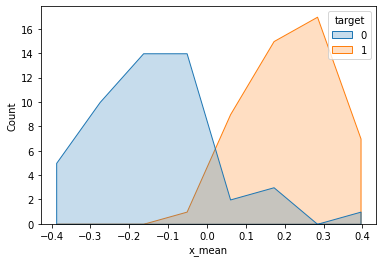

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt, mpld3
sns.histplot(data=df, x='x_mean', hue='target', element='poly')

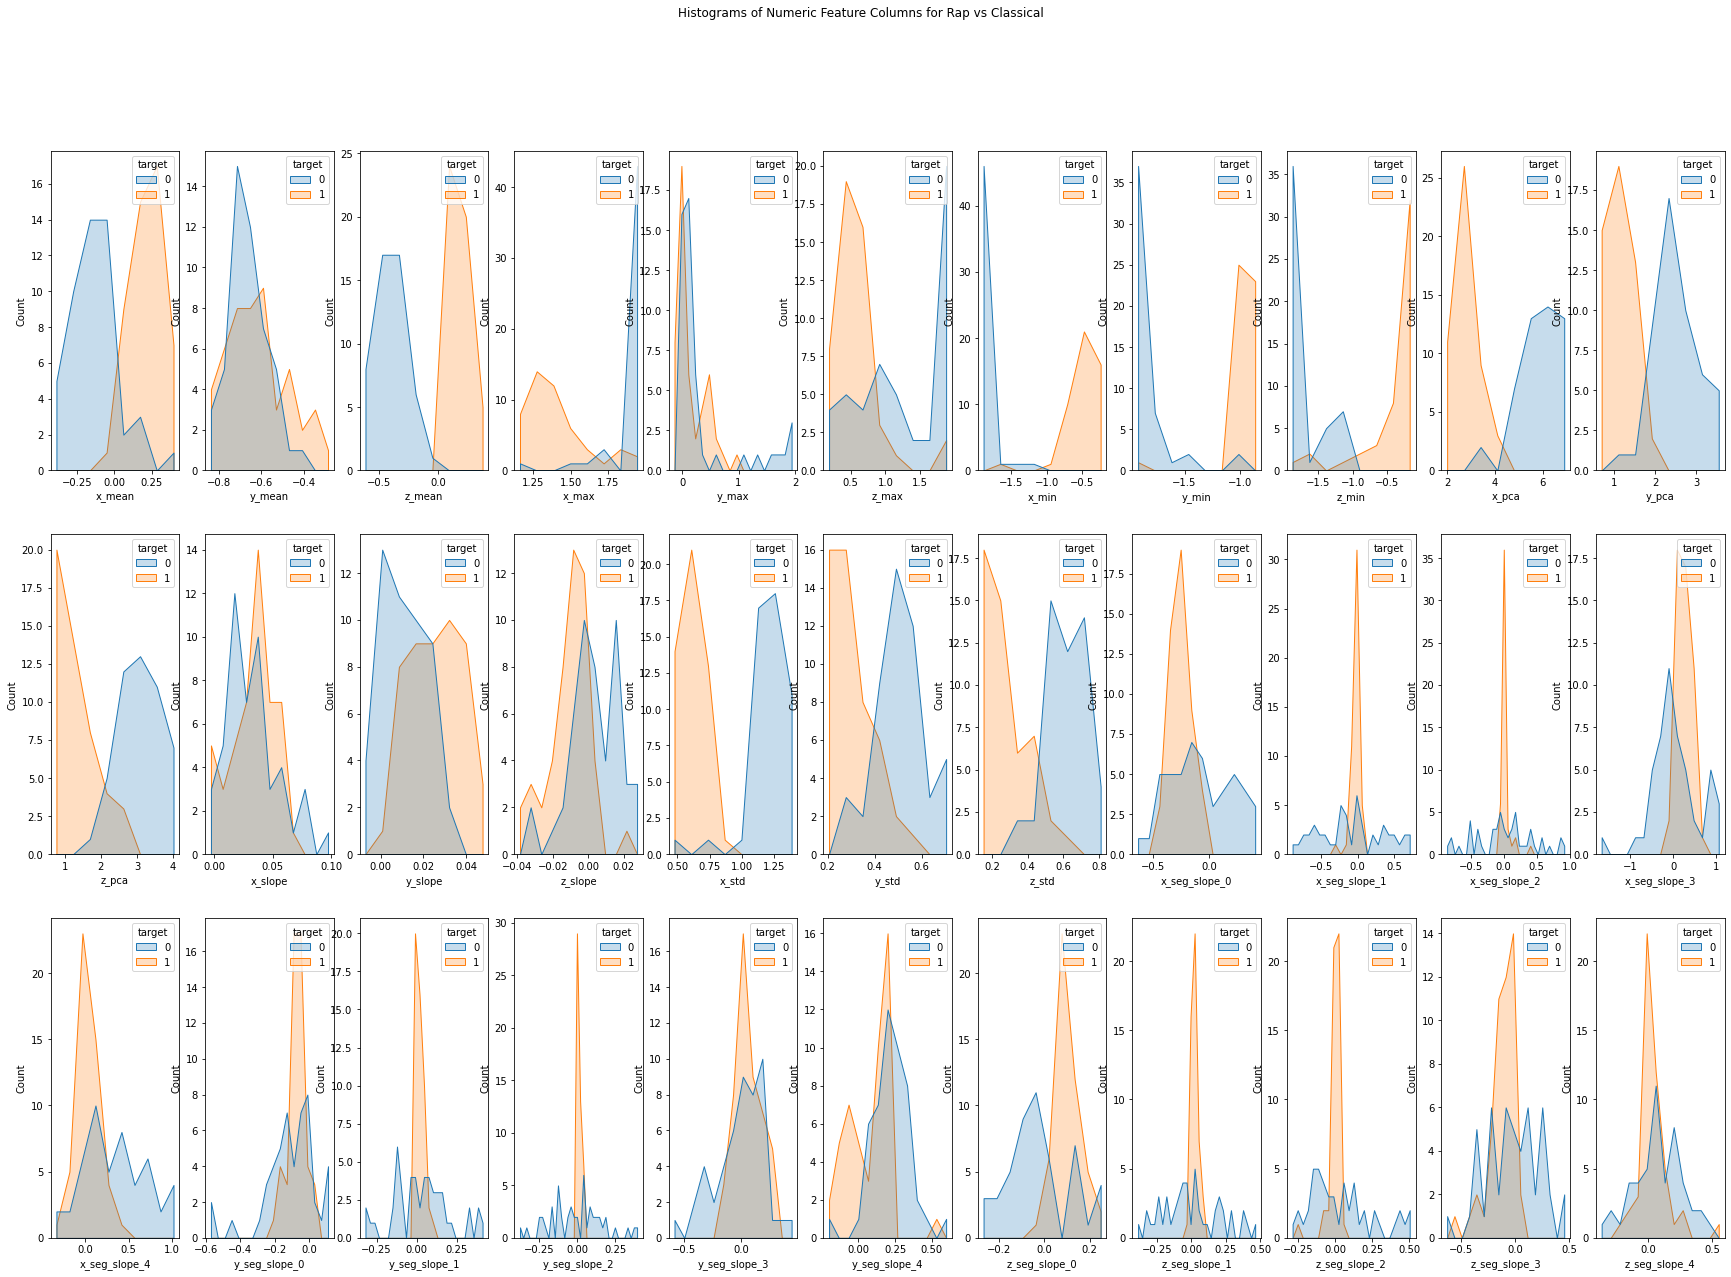

In [9]:
fig, axes = plt.subplots(3, 11, figsize=(30, 20))
fig.suptitle('Histograms of Numeric Feature Columns for Rap vs Classical')  

cnt = 0
for i in range(3):
    for j in range(11):
        sns.histplot(ax=axes[i, j], data=df, x=df.columns[cnt], hue="target", element='poly')
        cnt += 1

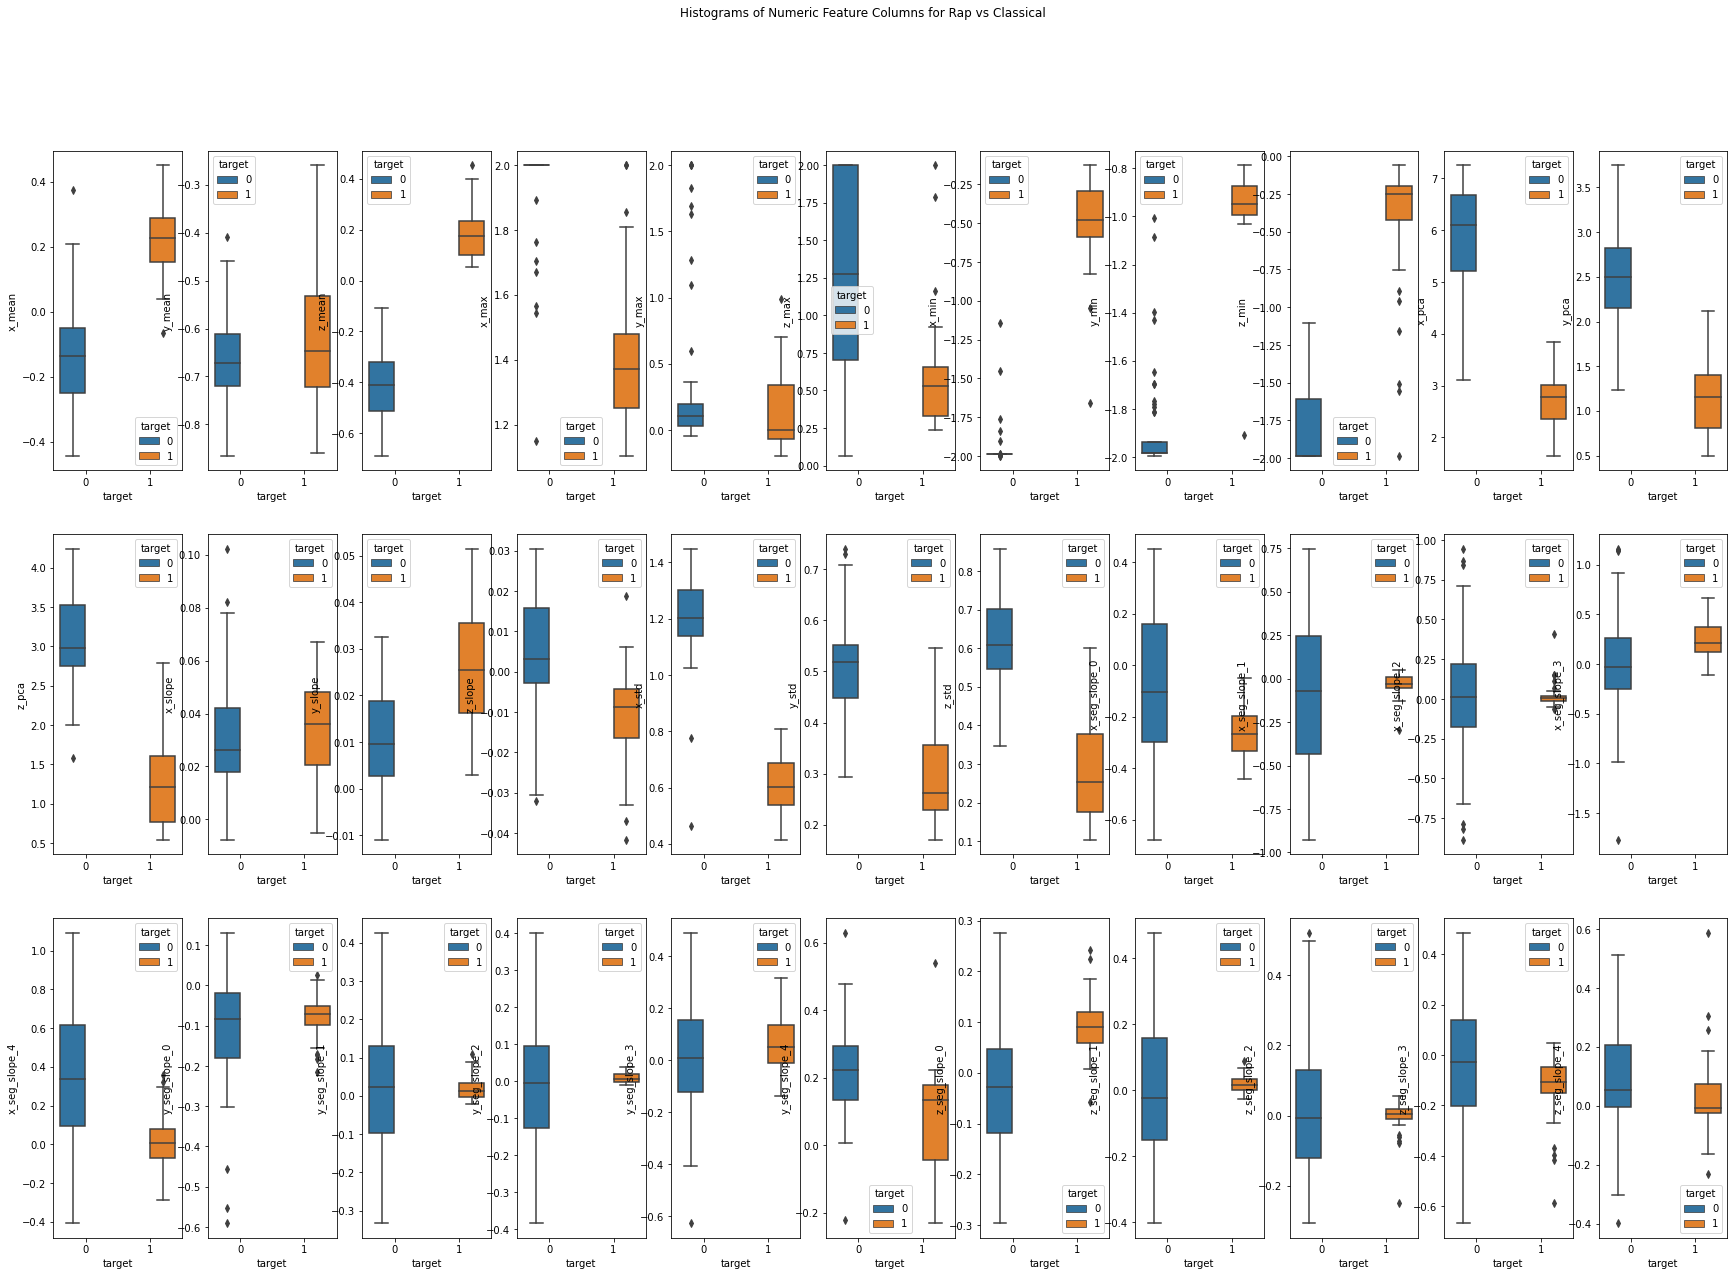

In [12]:
fig, axes = plt.subplots(3, 11, figsize=(30, 20))
fig.suptitle('Histograms of Numeric Feature Columns for Rap vs Classical')  

cnt = 0
for i in range(3):
    for j in range(11):
        sns.boxplot(ax=axes[i, j], data=df, x='target', y=df.columns[cnt], hue="target")
        cnt += 1

In [13]:
import plotly.express as px
data = df.corr()
fig = px.imshow(data,text_auto=True, width=800, height=800)
fig